For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

Scenario
You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

<b/> Round 1 - #Target variable Churn is discrete. (But) we have a clasification problem here

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. 
- Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- (optional)Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.


In [3]:
# Libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import Normalizer, StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [4]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [5]:
# Load the data
churn_df = pd.read_csv("DATA_Customer-Churn.csv")
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [6]:
# input variables
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type.

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

Convert this column into numeric type using pd.to_numeric function.

In [8]:
og_df = pd.read_csv("DATA_Customer-Churn.csv")

In [9]:
og_df['TotalCharges'].value_counts(dropna=False).to_frame()

,TotalCharges
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1
3211.9,1


In [10]:
# convert the 'TotalCharges' column to numeric type
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

# print the first 5 rows of the DataFrame to check the conversion
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

Check for null values in the dataframe. Replace the null values.

In [11]:
churn_df.isna().sum() # There are 11 NaNs in Total charges

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
mean_TotalCharges = churn_df['TotalCharges'].mean()
mean_TotalCharges

2283.3004408418697

In [13]:
#Fill NaNs with Mean 
churn_df['TotalCharges'].fillna(value=mean_TotalCharges, inplace=True)

#Check if the NaNs are gone
churn_df.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [14]:
# select specific columns using loc method
new_numerical_df = churn_df.loc[:, ['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges','Churn']]

In [15]:
#Display new df
new_numerical_df.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes


In [16]:
# Defining X & Y
X = new_numerical_df.drop(columns=["Churn"])
y = new_numerical_df['Churn']

<b/> Train/Test Split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) 
# splitting the data into train and test sets

Scale the features either by using normalizer or a standard scaler.


In [18]:
# use Normalizer to scale the features
normalizer = Normalizer()
# fit xtrain
normalizer.fit(X_train)

# transform a new dataframe (X_train) using the scaler
X_train_scaled = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)

# transform a new dataframe (X_test) using the scaler
X_test_scaled = pd.DataFrame(normalizer.transform(X_test), columns=X_train.columns)

<b/> KNN classification

In [19]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [20]:
y_pred # of unseen data

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [21]:
y_test

941      No
1404     No
5515     No
3684     No
7017     No
       ... 
2464    Yes
5585    Yes
804     Yes
3190     No
3266     No
Name: Churn, Length: 1409, dtype: object

<b/> Confusion Matrices

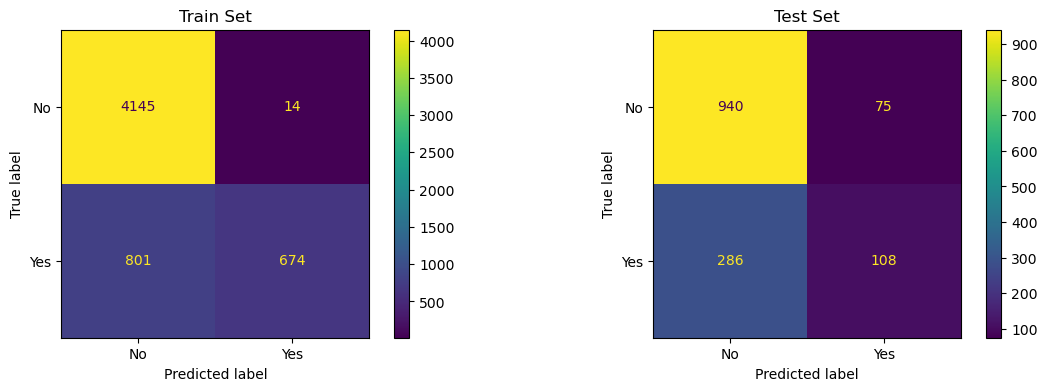

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Performance metrics

In [23]:
# We need to hot_encode first

# perform one-hot encoding on the target variable
one_hot = pd.get_dummies(new_numerical_df['Churn'], drop_first=True)

In [24]:
# concatenate the one-hot encoded dataframe with the original dataframe
new_df = pd.concat([new_numerical_df, one_hot], axis=1)
new_df = new_df.drop(columns=["Churn"])

In [25]:
new_df

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Yes
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [26]:
# Defining X & Y
X = new_df.drop(columns=["Yes"])
y = new_df['Yes']

In [27]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) 

In [28]:
# use Normalizer to scale the features
normalizer = Normalizer()
# fit xtrain
normalizer.fit(X_train)

# transform a new dataframe (X_train) using the scaler
X_train_scaled = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)

# transform a new dataframe (X_test) using the scaler
X_test_scaled = pd.DataFrame(normalizer.transform(X_test), columns=X_train.columns)

In [29]:
## KNN Clasification
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

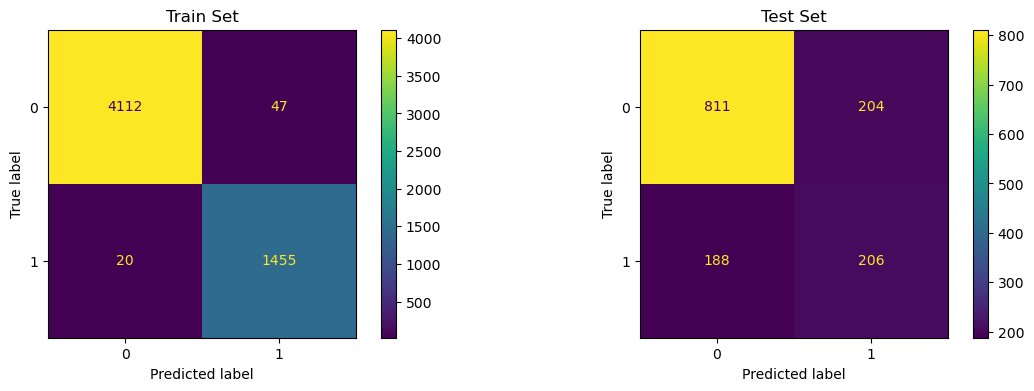

In [30]:
## Confusion
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [31]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [32]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.97,0.50
2,Recall,0.98,0.52


### Logistic reg
Fit a logistic Regression model on the training data.

In [33]:
#Packages
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


,Error_metric,Train,Test
0,Accuracy,0.79,0.80
1,Precision,0.65,0.70
2,Recall,0.43,0.46


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


Confusion matrix for the test set
[[957  74]
 [206 172]]


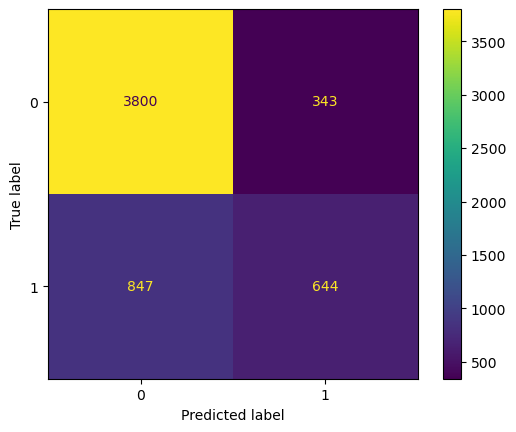

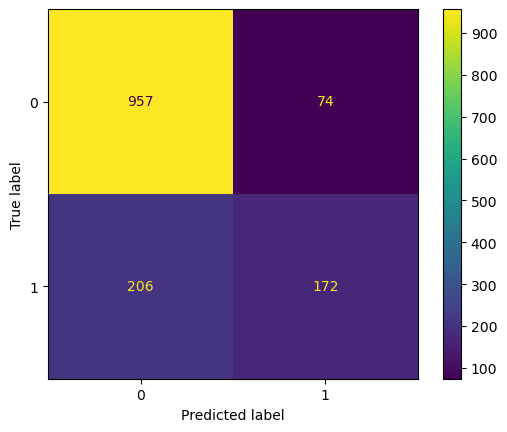

In [34]:
# Logistic regression from notbeook
log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


<b/> Function for best K

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

def knn_classificatio_evaluator(n, test_size=0.2, random_state=1234):
    # Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state) 
    # Scaling the input features using Normalizer
    normalizer = Normalizer()
    normalizer.fit(X_train)
    X_train_scaled = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(normalizer.transform(X_test), columns=X_train.columns)
    
    #fitting the KNN model
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
        
    performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance
for i in range(1,15):
    print("Error metrics for Knn model with n = ", i)
    display(knn_classificatio_evaluator(i))


Error metrics for Knn model with n =  1


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.98,0.44
2,Recall,0.98,0.47


Error metrics for Knn model with n =  2


,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.99,0.58
2,Recall,0.48,0.29


Error metrics for Knn model with n =  3


,Error_metric,Train,Test
0,Accuracy,0.87,0.74
1,Precision,0.80,0.50
2,Recall,0.68,0.44


Error metrics for Knn model with n =  4


,Error_metric,Train,Test
0,Accuracy,0.84,0.77
1,Precision,0.86,0.59
2,Recall,0.47,0.31


Error metrics for Knn model with n =  5


,Error_metric,Train,Test
0,Accuracy,0.84,0.77
1,Precision,0.76,0.56
2,Recall,0.60,0.43


Error metrics for Knn model with n =  6


,Error_metric,Train,Test
0,Accuracy,0.82,0.78
1,Precision,0.79,0.62
2,Recall,0.46,0.35


Error metrics for Knn model with n =  7


,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.72,0.58
2,Recall,0.55,0.44


Error metrics for Knn model with n =  8


,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.77,0.61
2,Recall,0.45,0.34


Error metrics for Knn model with n =  9


,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.71,0.56
2,Recall,0.53,0.42


Error metrics for Knn model with n =  10


,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.74,0.59
2,Recall,0.44,0.37


Error metrics for Knn model with n =  11


,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.70,0.58
2,Recall,0.51,0.44


Error metrics for Knn model with n =  12


,Error_metric,Train,Test
0,Accuracy,0.81,0.78
1,Precision,0.72,0.61
2,Recall,0.45,0.38


Error metrics for Knn model with n =  13


,Error_metric,Train,Test
0,Accuracy,0.81,0.78
1,Precision,0.68,0.59
2,Recall,0.50,0.44


Error metrics for Knn model with n =  14


,Error_metric,Train,Test
0,Accuracy,0.80,0.78
1,Precision,0.71,0.62
2,Recall,0.43,0.38


### Decision Trees

In [36]:
#Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


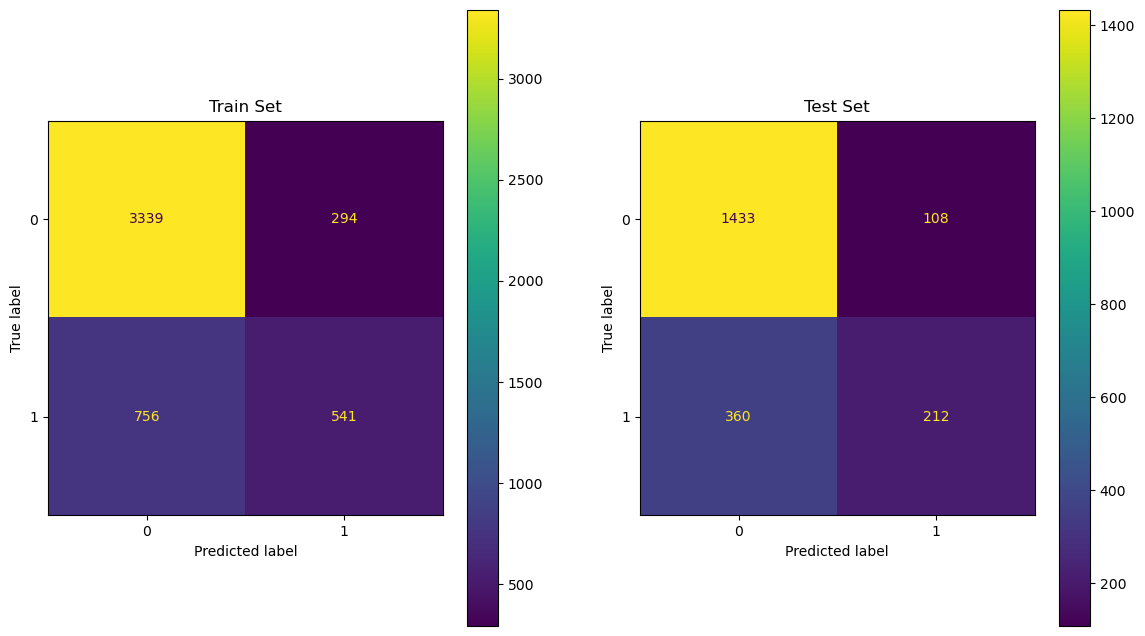

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

<b/> Function for best Depth of decision trees

In [38]:
#Function
def depth_evaluation_decision_tree (n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

    # Bear in mind that sklearn uses a different function for decission trees used for 
    # classification ( to predict a categorical feature ): DecisionTreeClassifier() 
    model = DecisionTreeClassifier(max_depth=n)

    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)


    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

    return performance_df
for i in range(1,9):
    print("Error metrics for DecisionTree model with depth n = ", i)
    display(depth_evaluation_decision_tree(i))

Error metrics for DecisionTree model with depth n =  1


/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.74,0.73
1,Precision,0.00,0.00
2,Recall,0.00,0.00


Error metrics for DecisionTree model with depth n =  2


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


Error metrics for DecisionTree model with depth n =  3


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


Error metrics for DecisionTree model with depth n =  4


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


Error metrics for DecisionTree model with depth n =  5


,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.69,0.64
2,Recall,0.45,0.39


Error metrics for DecisionTree model with depth n =  6


,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.72,0.64
2,Recall,0.43,0.36


Error metrics for DecisionTree model with depth n =  7


,Error_metric,Train,Test
0,Accuracy,0.82,0.77
1,Precision,0.74,0.63
2,Recall,0.48,0.39


Error metrics for DecisionTree model with depth n =  8


,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.74,0.60
2,Recall,0.56,0.44


In [39]:
# 3) compare decision tree, log reg and KNN Class

### Round 3
apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [40]:
# We need to re-balance all the train data
# Upsampling using SMOTE
# we already spliited x & y

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [42]:
y.value_counts()

0    5174
1    1869
Name: Yes, dtype: int64

In [43]:
# Here is where the magic happens
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts() # Now our churn is rebalanced

0    5174
1    5174
Name: Yes, dtype: int64

In [57]:
#Now we go an repeat the process for evey model :)

In [66]:
# split dataset into training and test sets
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=123)

# scale the feature data
scaler = StandardScaler()
X_train_scaled_sm = scaler.fit_transform(X_sm_train)
X_test_scaled_sm = scaler.transform(X_sm_test)


### KNN Classification sm

In [67]:
def knn_classifier_model (X_train_scaled_sm, y_sm_train, X_sm_test):
    # create KNeighborsClassifier model
    # N-neigbors since it showed the best results
    model = KNeighborsClassifier(n_neighbors=6, weights='uniform')
    
    # train model
    model.fit(X_train_scaled_sm, y_sm_train)
    
    # predict test set and train set
    y_pred = model.predict(X_sm_test)
    y_pred_train = model.predict(X_sm_train)
    
    # return predictions for test set
    return y_pred

In [75]:
# call the knn_classifier function to get predictions
y_pred_knn = knn_classifier_model(X_train_scaled_sm, y_sm_train, X_test_scaled_sm)
y_pred_knn

/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([1, 0, 1, ..., 0, 1, 0], dtype=uint8)

### Logistic regression sm

In [74]:
# Logistic regression
log_model_sm = LogisticRegression() 

log_model_sm.fit(X_train_scaled_sm, y_sm_train)

y_pred_train_sm = log_model_sm.predict(X_sm_train)
y_pred_test_sm = log_model_sm.predict(X_sm_test)
y_pred_test_sm

/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

### Decision tree sm

In [78]:
# since 7 was the best max depth we are gonna use it
model_decision = DecisionTreeClassifier(max_depth=7) 

model.fit(X_train_scaled_sm, y_sm_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)
y_pred_test_dt

/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

<b/> Model comparison - score - K fold

In [79]:
from sklearn.model_selection import cross_val_score

In [82]:



# define the list of models and their corresponding names
model_pipeline = [model_decision, log_model_sm, model]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']

# create an empty dictionary to store the cross-validation scores
scores = {}

# loop through each model and calculate the mean cross-validation score
i = 0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i + 1

# print the dictionary of scores
print(scores)

TypeError: estimator should be an estimator implementing 'fit' method, array([1, 0, 1, ..., 0, 1, 0], dtype=uint8) was passed

# Scores

<b/> Decision tree

In [54]:
scores=cross_val_score(model, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.77079108 0.78093306 0.77484787 0.77281947 0.75760649]
Score stats: 0.77 accuracy with a standard deviation of 0.01


In [55]:
print("Comparing the 5 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 5 regression scores we find 



,0,1,2,3,4
score,0.77,0.78,0.77,0.77,0.76
